In [ ]:
# !pip install tensorflow mnist matplotlib numpy

### **Практическое задание**

1. Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете
MNIST с другими параметрами. Напишите в комментарии к уроку:

    ➜ Какого результата вы добились от нейросети?

    ➜ Что помогло вам улучшить её точность?

2. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras,
неразобранные на уроке.


### **1. Модель с другими параметрами**

In [499]:
import mnist
from tensorflow.keras.layers import Flatten
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import tensorflow.keras.backend as K

In [500]:
np.random.seed(123)
tensorflow.random.set_seed(123)

In [501]:
# Загрузка датасета

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print("var: %.4f" % np.var(train_images))
print("mean: %.4f" % np.mean(train_images))
print()
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

var: 0.0949
mean: -0.3693

(60000, 28, 28)
(60000,)


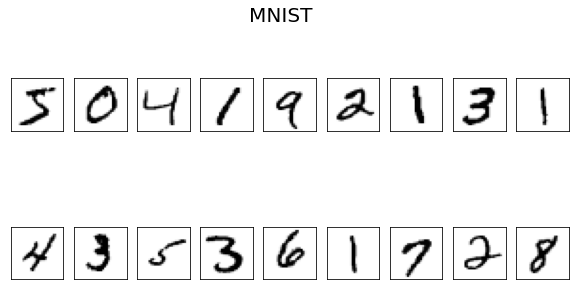

In [502]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [503]:
# Конструирование модели

np.random.seed(123)
tensorflow.random.set_seed(123)

model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(80, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [504]:
# Компиляция модели

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [505]:
%%time
# Обучение модели на трейне

model.fit(train_images, 
          to_categorical(train_labels), # one hot encoding labels
          epochs=7, 
          batch_size=32, 
          shuffle=False)

# Начальные параметры
# Epoch 1/5
# 1875/1875 [==============================] - 7s 3ms/step - loss: 0.3962 - accuracy: 0.8827
# Epoch 2/5
# 1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9377
# Epoch 3/5
# 1875/1875 [==============================] - 6s 3ms/step - loss: 0.1554 - accuracy: 0.9530
# Epoch 4/5
# 1875/1875 [==============================] - 6s 3ms/step - loss: 0.1288 - accuracy: 0.9610
# Epoch 5/5
# 1875/1875 [==============================] - 6s 3ms/step - loss: 0.1120 - accuracy: 0.9653

Epoch 1/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3580 - accuracy: 0.8936
Epoch 2/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1767 - accuracy: 0.9461
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1368 - accuracy: 0.9582
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1152 - accuracy: 0.9642
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0980 - accuracy: 0.9695
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.9723
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0787 - accuracy: 0.9754
CPU times: user 55.3 s, sys: 3.23 s, total: 58.5 s
Wall time: 1min 22s


In [506]:
# Оценка модели на тесте

model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Начальная оценка
# [0.14340953528881073, 0.9545000195503235]

313/313 [==============================] - 1s 2ms/step - loss: 0.1206 - accuracy: 0.9654


[0.1205938383936882, 0.965399980545044]

In [507]:
# Предсказание результатов

predictions = model.predict(test_images)

In [508]:
# Предсказанные ответы
print(np.argmax(predictions, axis=1)[:15]) 

# Реальные ответы
print(test_labels[:15]) 

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


### **Вывод:**

**Параметры начальной модели:**
  - Flatten(input_shape=(28, 28)),
  - Dense(64, activation='relu'),
  - Dense(64, activation='relu'),
  - Dense(10, activation='softmax')
  - epochs=5, 
  - batch_size=32

**Accuracy:**
  - на трейне <font color='red'>**0.9653**</font>
  - на тесте <font color='red'>**0.9545**</font>
---
 1. Уберем один слой Dense(64, activation='relu').
  
  **Accuracy:**
  - на трейне **0.9610**
  - на тесте **0.9538**

 Точность снизилась.
---
 2. Заменим функцию активации на 'tanh'.
  
  **Accuracy:**
  - на трейне **0.9692**
  - на тесте **0.9598**
  
  Точность увеличилась.
---
 3. Добавим в первом слое больше нейронов Dense(80, activation='relu').
  
  **Accuracy:**
  - на трейне **0.9695**
  - на тесте **0.9609**
  
  Точность увеличилась.
---
 4. Добавим еще один слой Dense(32, activation='relu').
  
  **Accuracy:**
  - на трейне **0.9677**
  - на тесте **0.9609**
  
  Точность увеличилась.
---
 5. Увеличим количество эпох до 7.
  
  **Accuracy:**
  - на трейне **0.9724**
  - на тесте **0.9616**
  
  Точность увеличилась.
---
 6. Увеличим размер батча до 71.
  
  **Accuracy:**
  - на трейне **0.9644**
  - на тесте **0.9572**
  
  Точность на трейне снизилась, на тесте увеличилась.
---
 7. Скомбинируем предыдущие параметры: изменим функцию активации, добавим слой, добавим нейронов в первый слой и увеличим количество эпох.
  
  **Accuracy:**
  - на трейне **0.9724**
  - на тесте **0.9579**
  
  Точность увеличилась, больше на трейне и совсем чуть-чуть на тесте. Вероятно модель переобучилась.


**Параметры финальной модели:**
  - Flatten(input_shape=(28, 28)),
  - Dense(80, activation='relu'),
  - Dense(64, activation='relu'),
  - Dense(10, activation='softmax')
  - epochs=7, 
  - batch_size=32

**Accuracy:**
  - на трейне <font color='lightseagreen'>**0.9754**</font>
  - на тесте <font color='lightseagreen'>**0.9654**</font>

Некоторые наблюдения:
 - Точность повышается при увеличении таких параметров как: количество слоев, количество нейронов, количество эпох.
 - Возможно повышение точности при смене функции активации.
 - Увеличение размера батча снижает точность.
 - Комбинирование параметров, которые увеличивают точность по отдельности, могут не дать большого скачка в росте метрики, и даже может привести к переобучению модели. В связи с чем лучше сравнивать метрику не только с начальным/базовым состоянием, а изменять параметры, двигаясь последовательно от наилучшего результата.




  

### **2. Полезные команды Keras**

In [509]:
# Нормализация данных

from tensorflow.keras.layers import Normalization

normalizer = Normalization(axis=-1)
normalizer.adapt(train_images)

normalized_data = normalizer(train_images)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: -0.0001


In [510]:
# Вывод информации о модели

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 80)                62800     
                                                                 
 dense_59 (Dense)            (None, 64)                5184      
                                                                 
 dense_60 (Dense)            (None, 10)                650       
                                                                 
Total params: 68,634
Trainable params: 68,634
Non-trainable params: 0
_________________________________________________________________


In [512]:
# Сохранение истории и вывод ошибки/метрики в каждой эпохе

history = model.fit(train_images, to_categorical(train_labels), batch_size=32, epochs=2)

print()
print(history.history)

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766 - accuracy: 0.9753
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9779

{'loss': [0.07663091272115707, 0.06822118908166885], 'accuracy': [0.9752500057220459, 0.9778833389282227]}


In [513]:
# Добавление в обучение валидационных данных

model.fit(train_images, to_categorical(train_labels), batch_size=32, epochs=2, validation_split=0.20)

Epoch 1/2
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0633 - accuracy: 0.9788 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 2/2
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0554 - accuracy: 0.9814 - val_loss: 0.0665 - val_accuracy: 0.9779


In [514]:
# Подбор гипер параметров для модели
# pip install keras_tuner

import keras_tuner
from tensorflow.keras import layers

train_images = mnist.train_images()
train_labels = mnist.train_labels()

# Normalize the pixel values to the range of [0, 1].
train_images = train_images.astype("float32") / 255

# Add the channel dimension to the images.
train_images = np.expand_dims(train_images, -1)

# Print the shapes of the data.
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [515]:
def build_model(hp):
    inputs = keras.Input(shape=(28, 28, 1))
    # Model type can be MLP or CNN.
    model_type = hp.Choice("model_type", ["mlp", "cnn"])
    x = inputs
    if model_type == "mlp":
        x = layers.Flatten()(x)
        # Number of layers of the MLP is a hyperparameter.
        for i in range(hp.Int("mlp_layers", 1, 3)):
            # Number of units of each layer are
            # different hyperparameters with different names.
            output_node = layers.Dense(
                units=hp.Int(f"units_{i}", 32, 128, step=32), activation="relu",
            )(x)
    else:
        # Number of layers of the CNN is also a hyperparameter.
        for i in range(hp.Int("cnn_layers", 1, 3)):
            x = layers.Conv2D(
                hp.Int(f"filters_{i}", 32, 128, step=32),
                kernel_size=(3, 3),
                activation="relu",
            )(x)
            x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Flatten()(x)

    # A hyperparamter for whether to use dropout layer.
    if hp.Boolean("dropout"):
        x = layers.Dropout(0.5)(x)

    # The last layer contains 10 units,
    # which is the same as the number of classes.
    outputs = layers.Dense(units=10, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model.
    # model.compile(
    #     optimizer="adam",
    #     loss="sparse_categorical_crossentropy", metrics=["accuracy"], 
    # )
    
    model.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    # The output variables if represented as integers, then you need to use SparseCategoricalCrossentropy. If you use the output as a one hot encoding vector then you can use CategoricalCrossentropy() 

    return model

In [516]:
# Initialize the `HyperParameters` and set the values.
hp = keras_tuner.HyperParameters()
hp.values["model_type"] = "cnn"

# Build the model using the `HyperParameters`.
model = build_model(hp)

# Test if the model runs with our data.
model(train_images[:100])

# Print a summary of the model.
model.summary()

# Do the same for MLP model.
hp.values["model_type"] = "mlp"
model = build_model(hp)
model(train_images[:100])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_20 (Flatten)        (None, 5408)              0         
                                                                 
 dense_61 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_______________________________________________________

In [517]:
tuner = keras_tuner.RandomSearch(
    build_model,
    max_trials=3,
    # Do not resume the previous search in the same directory.
    overwrite=True,
    objective="val_accuracy",
    # Set a directory to store the intermediate results.
    directory="/tmp/tb",
)

In [518]:
tuner.search(
    train_images,
    train_labels,
    validation_split=0.2,
    epochs=2,
    # Use the TensorBoard callback.
    # The logs will be write to "/tmp/tb_logs".
    callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs")],
)

Trial 3 Complete [00h 00m 10s]
val_accuracy: 0.9194166660308838

Best val_accuracy So Far: 0.9759166836738586
Total elapsed time: 00h 01m 45s
INFO:tensorflow:Oracle triggered exit


In [519]:
models = tuner.get_best_models(num_models=2)

In [520]:
tuner.results_summary()

Results summary
Results in /tmp/tb/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
model_type: cnn
mlp_layers: 1
units_0: 64
dropout: True
units_1: 128
cnn_layers: 1
filters_0: 32
Score: 0.9759166836738586
Trial summary
Hyperparameters:
model_type: mlp
mlp_layers: 2
units_0: 128
dropout: False
units_1: 96
cnn_layers: 1
filters_0: 128
Score: 0.9194166660308838
Trial summary
Hyperparameters:
model_type: mlp
mlp_layers: 2
units_0: 96
dropout: True
units_1: 32
Score: 0.9154166579246521


In [521]:
# Сохранение и загрузка весов

# # Save the model to disk.
# model.save_weights('model.h5')

# # Load the model from disk later using:
# model.load_weights('model.h5')